In [1]:
# Load packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the Oil spill data into dataframe

df = pd.read_csv('Oilspillage.csv')
df.head()

,Date Reported,Incident Site,JIV Date,Terrain,Cause,Estimated Spill Volume (bbl),Recovered Spill Volume (bbl),Clean-up Status,Comments,Photo,JIV Report
0,"Jan 02, 2019",12'' Imo River2 - Ogale Pipeline at Isi-Etitiu...,"Jan 04, 2019",Land,Sabotage,1.0,NaN,"No recoverable oil found, assessment completed...",-,Download,Download
1,"Jan 03, 2019",10'' Diebucreek-Nunriver Pipeline at Oporoma,"Jan 09, 2019",Land,Sabotage,3.0,NaN,"No recoverable oil found, assessment completed...",-,Download,Download
2,"Jan 07, 2019","12"" Oguta -Egbema Pipeline at Umunkwu-Oguta","Jan 11, 2019",Land,Sabotage,410.0,321.0,"Recovery completed on 14 Jan 2019, assessment ...",-,Download,Download
3,"Jan 08, 2019",16'' Nunriver - Kolocreek Pipeline at Aguobiri,"Jan 12, 2019",Land,Sabotage,125.0,81.0,"Recovery completed on 08 Feb 2019, assessment ...",-,Download,Download
4,"Jan 09, 2019",14'' Okordia - Rumuekpe Pipeline at Ula-Ikata,"Jan 13, 2019",Land,Sabotage,535.0,363.0,"Recovery completed on 05 Feb 2019, assessment ...",-,Download,Download


In [3]:
# use drop to remove the columns
columns_to_drop = ['Incident Site','Clean-up Status', 'Comments', 'Photo', 'JIV Report']

df = df.drop(columns=columns_to_drop)
df.head()

,Date Reported,JIV Date,Terrain,Cause,Estimated Spill Volume (bbl),Recovered Spill Volume (bbl)
0,"Jan 02, 2019","Jan 04, 2019",Land,Sabotage,1.0,NaN
1,"Jan 03, 2019","Jan 09, 2019",Land,Sabotage,3.0,NaN
2,"Jan 07, 2019","Jan 11, 2019",Land,Sabotage,410.0,321.0
3,"Jan 08, 2019","Jan 12, 2019",Land,Sabotage,125.0,81.0
4,"Jan 09, 2019","Jan 13, 2019",Land,Sabotage,535.0,363.0


In [4]:
# Rename the column for consistency and understanding
df = df.rename(columns= {'Date Reported':'Date_Reported', 'JIV Date':'JIV_Date', 'Estimated Spill Volume (bbl)':'Spill(Vol)', 'Recovered Spill Volume (bbl)':'Recovered(Vol)'})
                    
df.head()

,Date_Reported,JIV_Date,Terrain,Cause,Estimated_Spill,Recovered_Spill
0,"Jan 02, 2019","Jan 04, 2019",Land,Sabotage,1.0,NaN
1,"Jan 03, 2019","Jan 09, 2019",Land,Sabotage,3.0,NaN
2,"Jan 07, 2019","Jan 11, 2019",Land,Sabotage,410.0,321.0
3,"Jan 08, 2019","Jan 12, 2019",Land,Sabotage,125.0,81.0
4,"Jan 09, 2019","Jan 13, 2019",Land,Sabotage,535.0,363.0


In [5]:
# fill missing values with 0
df['Recovered_Spill'].fillna(0, inplace=True)

In [8]:
# Convert the date columns to datetime objects
df["Date_Reported"] = pd.to_datetime(df["Date_Reported"])
df["JIV_Date"] = pd.to_datetime(df["JIV_Date"])

# Add a new column to extract year from the Date_Reported column
df['Year'] = df['Date_Reported'].dt.year

# Add a columns to extract month from the Date_Reported column
df['Month'] = df['Date_Reported'].dt.strftime('%B')

df.head()

,Date_Reported,JIV_Date,Terrain,Cause,Estimated_Spill,Recovered_Spill,Year,month,Month
0,2019-01-02,2019-01-04,Land,Sabotage,1.0,0.0,2019,1,January
1,2019-01-03,2019-01-09,Land,Sabotage,3.0,0.0,2019,1,January
2,2019-01-07,2019-01-11,Land,Sabotage,410.0,321.0,2019,1,January
3,2019-01-08,2019-01-12,Land,Sabotage,125.0,81.0,2019,1,January
4,2019-01-09,2019-01-13,Land,Sabotage,535.0,363.0,2019,1,January


In [13]:
# Create a new column to calculate a time difference
df["Time Difference (days)"] = (df["JIV_Date"] - df["Date_Reported"]).dt.days

# Create a new column to calculate recovery efficiency (%)
df["Recovery Efficiency (%)"] = (df["Recovered_Spill"] / df["Estimated_Spill"]) * 100

df.head()

,Date_Reported,JIV_Date,Terrain,Cause,Estimated_Spill,Recovered_Spill,Year,month,Month,Time Difference (days),Recovery Efficiency (%)
0,2019-01-02,2019-01-04,Land,Sabotage,1.0,0.0,2019,1,January,2,0.000000
1,2019-01-03,2019-01-09,Land,Sabotage,3.0,0.0,2019,1,January,6,0.000000
2,2019-01-07,2019-01-11,Land,Sabotage,410.0,321.0,2019,1,January,4,78.292683
3,2019-01-08,2019-01-12,Land,Sabotage,125.0,81.0,2019,1,January,4,64.800000
4,2019-01-09,2019-01-13,Land,Sabotage,535.0,363.0,2019,1,January,4,67.850467


#### The average cost of global crude oil per barrel in 2019 was $64.18 per barrel.

##### Sources:

OPEC Annual Statistical Bulletin 2020

U.S. Energy Information Administration (EIA)

In [14]:
# Cost of crude per barrel 
cost_per_barrel = 64.18

In [15]:
# Create a new column to calculate the Amount loss for each spill records
df['Financial_Loss'] = df['Estimated_Spill'] * cost_per_barrel

df.head()

,Date_Reported,JIV_Date,Terrain,Cause,Estimated_Spill,Recovered_Spill,Year,month,Month,Time Difference (days),Recovery Efficiency (%),Financial_Loss
0,2019-01-02,2019-01-04,Land,Sabotage,1.0,0.0,2019,1,January,2,0.000000,64.18
1,2019-01-03,2019-01-09,Land,Sabotage,3.0,0.0,2019,1,January,6,0.000000,192.54
2,2019-01-07,2019-01-11,Land,Sabotage,410.0,321.0,2019,1,January,4,78.292683,26313.80
3,2019-01-08,2019-01-12,Land,Sabotage,125.0,81.0,2019,1,January,4,64.800000,8022.50
4,2019-01-09,2019-01-13,Land,Sabotage,535.0,363.0,2019,1,January,4,67.850467,34336.30


# Exploratory Data Analysis

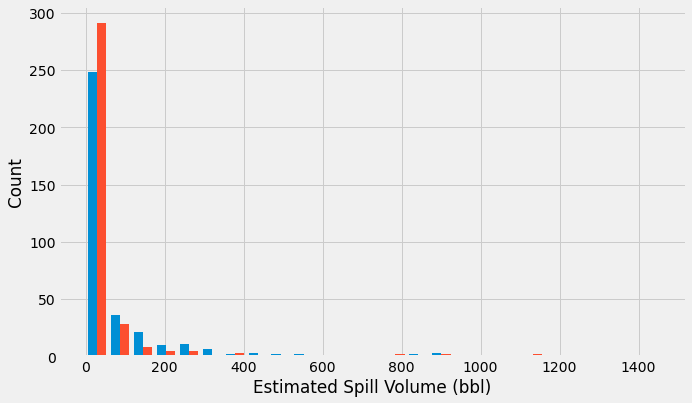

In [16]:
# Exploring the Datasets through Histogram
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
plt.hist(df[["Estimated_Spill", 'Recovered_Spill']], bins=25)
plt.xlabel("Estimated Spill Volume (bbl)")
plt.ylabel("Count")
plt.show()


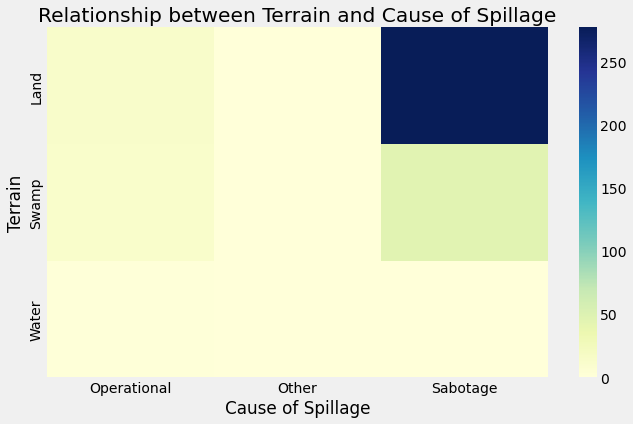

In [34]:
# Create a crosstab table of terrain and cause
terrain_cause_xtab = pd.crosstab(df['Terrain'], df['Cause'])

# Plot a heatmap of the crosstab table
plt.figure(figsize=(10,6))
sns.heatmap(terrain_cause_xtab, cmap='YlGnBu')
plt.xlabel('Cause of Spillage')
plt.ylabel('Terrain')
plt.title('Relationship between Terrain and Cause of Spillage')
plt.show()


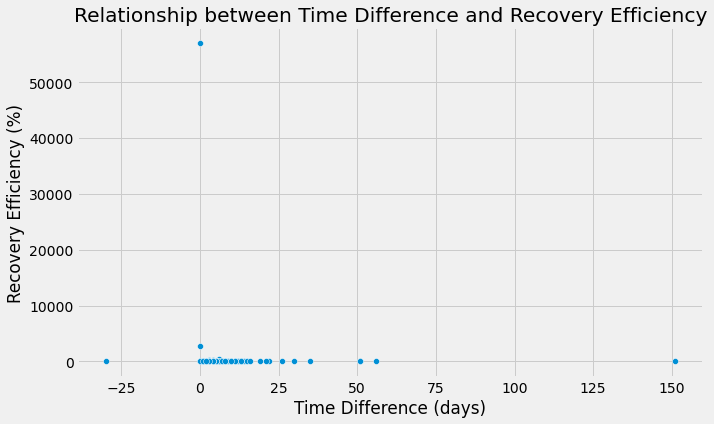

In [35]:
# Create a scatterplot of time difference vs. recovery efficiency
plt.figure(figsize=(10,6))
sns.scatterplot(x='Time Difference (days)', y='Recovery Efficiency (%)', data=df)
plt.xlabel('Time Difference (days)')
plt.ylabel('Recovery Efficiency (%)')
plt.title('Relationship between Time Difference and Recovery Efficiency')
plt.show()

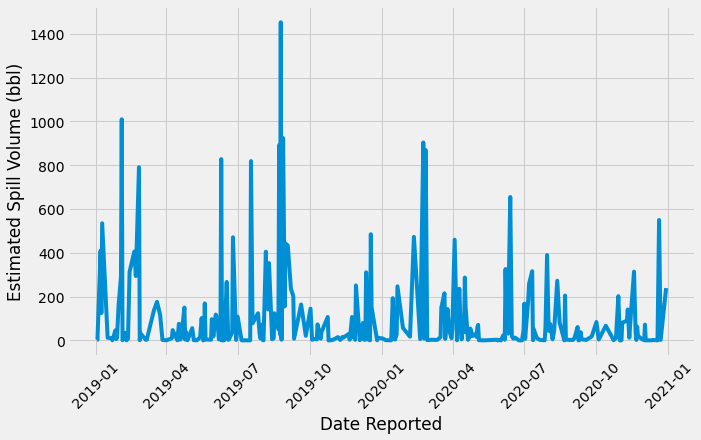

In [21]:
# Line plot of Estimated Spill Volume over time
plt.figure(figsize=(10,6))
df_by_date = df.groupby("Date_Reported").sum()
plt.plot(df_by_date.index, df_by_date["Estimated_Spill"])
plt.xlabel("Date Reported")
plt.ylabel("Estimated Spill Volume (bbl)")
plt.xticks(rotation=45)
plt.show()


In [40]:
# Create a measure to group the data by month and sum the estimated spill volume
monthly_spill = df.groupby('Month')['Estimated_Spill'].sum()


In [41]:
# create a list of month names in the desired order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']


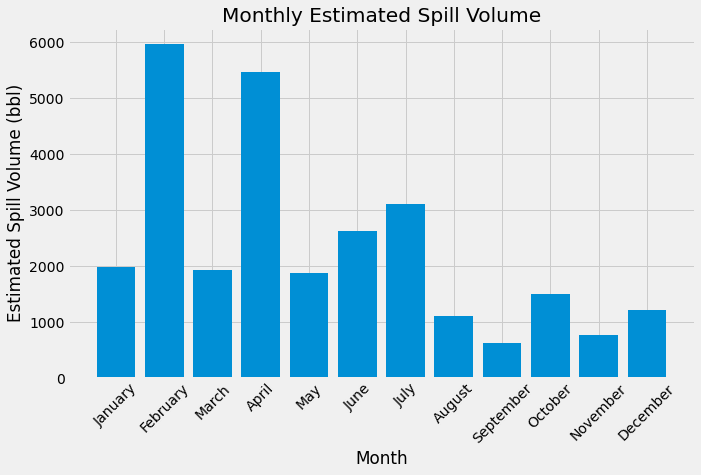

In [42]:

# plot the data with the ordered x-axis ticks
plt.figure(figsize=(10,6))
plt.bar(monthly_spill.index, monthly_spill.values)
plt.xlabel('Month')
plt.ylabel('Estimated Spill Volume (bbl)')
plt.title('Monthly Estimated Spill Volume')
plt.xticks(monthly_spill.index, month_order, rotation=45)
plt.show()


In [44]:
#Create a measure to calculate the total financial loss
total_loss = df['Financial_Loss'].sum()

# print the total financial loss
print('The Total Loss accrued: $ {:.2f}'.format(total_loss))

The Total Loss accrued: $ 1802886.16


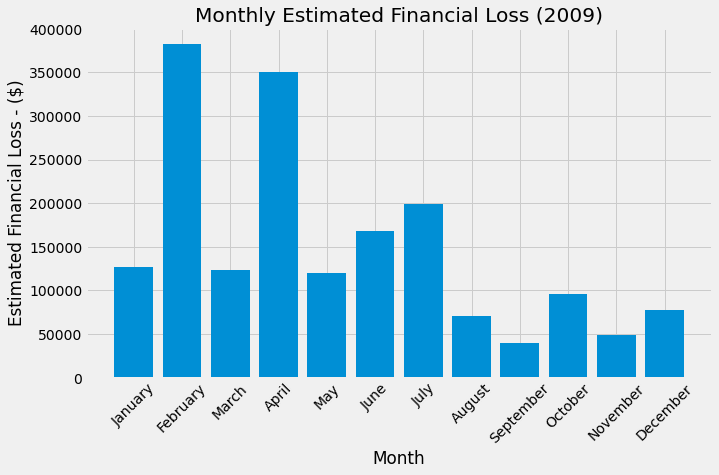

In [45]:
# Create a measure to group the data by month and sum the estimated financial loss
monthly_loss = df.groupby('Month')['Financial_Loss'].sum()

# plot the data with the ordered x-axis ticks
plt.figure(figsize=(10,6))
plt.bar(monthly_loss.index, monthly_loss.values)
plt.xlabel('Month')
plt.ylabel('Estimated Financial Loss - ($)')
plt.title('Monthly Estimated Financial Loss')
plt.xticks(monthly_loss.index, month_order, rotation=45)
plt.show()

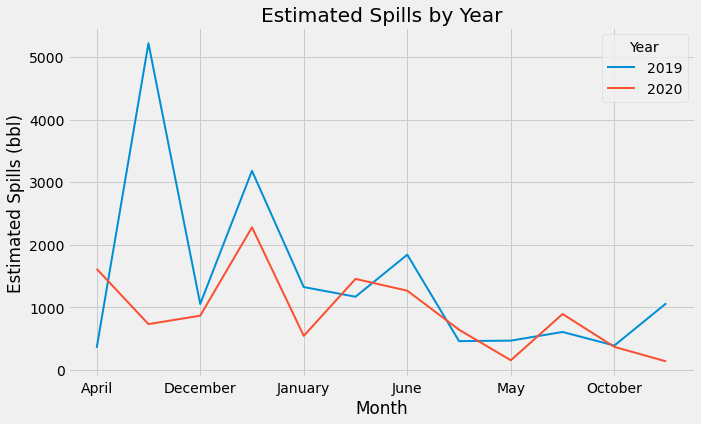

In [49]:
# Group the data by year and calculate the total estimated spills for each year
yearly_spills = df.groupby(['Year', 'Month'])['Estimated_Spill'].sum().reset_index()

# Create a pivot table to reshape the data for plotting
yearly_spills_pivot = yearly_spills.pivot(index='Month', columns='Year', values='Estimated_Spill')

# Plot the estimated spills by year as a line chart
ax = yearly_spills_pivot.plot(kind='line', figsize=(10, 6), linewidth=2)

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Estimated Spills (bbl)')
ax.set_title('Estimated Spills by Year')

# Show the plot
plt.show()


In [61]:
# get a list of unique values in the 'name' column
unique_month = df['Month'].unique()

# print the list of unique values
print(unique_month)

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
